In [52]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [53]:
df = pd.read_csv("nwsl_minutes.csv", index_col=[0, 1])
df

,,15,16,17,18,19,20,21,22,23,24,...,33,34,35,36,37,38,39,40,41,42
team,year,,,,,,,,,,,,,,,,,,,,,
LA,2022,NaN,NaN,NaN,NaN,NaN,NaN,360.0,2112.0,97.0,335.0,...,686.0,1589.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NC,2022,NaN,NaN,NaN,NaN,NaN,1359.0,251.0,2529.0,1364.0,940.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POR,2022,NaN,650.0,58.0,NaN,NaN,NaN,870.0,1043.0,3634.0,3142.0,...,512.0,791.0,NaN,206.0,1298.0,500.0,564.0,NaN,NaN,NaN
KC,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2713.0,2488.0,2335.0,...,NaN,1075.0,2715.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CHI,2022,NaN,NaN,NaN,NaN,NaN,NaN,508.0,833.0,1444.0,9121.0,...,NaN,2624.0,1049.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WNY,2016,NaN,NaN,NaN,NaN,NaN,45.0,1628.0,4828.0,7525.0,2376.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SEA,2016,NaN,NaN,NaN,NaN,NaN,NaN,136.0,850.0,322.0,34.0,...,NaN,720.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NJ,2016,NaN,NaN,NaN,NaN,NaN,NaN,1666.0,5762.0,3611.0,1429.0,...,938.0,NaN,NaN,NaN,NaN,NaN,NaN,810.0,990.0,NaN


## Figure out which teams need to be grouped

In [54]:
df.index.get_level_values(0).unique()

Index(['LA', 'NC', 'POR', 'KC', 'CHI', 'LOU', 'WAS', 'RGN', 'HOU', 'SD', 'ORL',
       'NJY', 'NJ', 'UTA', 'SEA', 'BOS', 'WNY'],
      dtype='object', name='team')

In [55]:
df.index = pd.MultiIndex.from_tuples(
    [(re.sub('NJ$', 'NJY', x[0]).replace("SEA", "RGN"), x[1]) for x in df.index]
)

## Group all seasons by year

In [56]:
df.index.get_level_values(1).unique()

Index(['2022', '2022 Challenge Cup', '2021', '2021 Challenge Cup',
       '2020 Fall Series', '2020 Challenge Cup', '2019', '2018', '2017',
       '2016'],
      dtype='object')

In [57]:
df.index = pd.MultiIndex.from_tuples(
    [(x[0], re.search(r'\d+', x[1]).group()) for x in df.index]
)

In [58]:
df = df.groupby(level=[0, 1]).sum()
df

15   16   17     18      19      20      21      22      23  \
BOS 2016  0.0  0.0  0.0    0.0     0.0     0.0   100.0  1464.0  2350.0   
    2017  0.0  0.0  0.0    0.0     0.0     0.0  1559.0  1626.0  4395.0   
CHI 2016  0.0  0.0  0.0    0.0     0.0     0.0     0.0  1654.0  6942.0   
    2017  0.0  0.0  0.0    0.0     0.0     0.0   134.0   327.0  2772.0   
    2018  0.0  0.0  0.0    0.0     0.0     0.0    90.0   521.0   485.0   
...       ...  ...  ...    ...     ...     ...     ...     ...     ...   
WAS 2019  0.0  0.0  0.0    0.0     0.0   180.0   932.0  5769.0  3858.0   
    2020  0.0  0.0  0.0    0.0     0.0     0.0   670.0   848.0  2756.0   
    2021  0.0  0.0  0.0  391.0  1608.0     0.0   912.0  3975.0  1298.0   
    2022  0.0  0.0  0.0    0.0   972.0  1234.0     0.0   717.0  8464.0   
WNY 2016  0.0  0.0  0.0    0.0     0.0    45.0  1628.0  4828.0  7525.0   

              24  ...     33     34   35   36   37   38   39   40   41   42  
BOS 2016  5343.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
    2017  5899.0  ...  804.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
CHI 2016  3740.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
    2017  6460.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
    2018  6049.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
...          ...  ...    ...    ...  ...  ...  ...  ...  ...  ...  ...  ...  
WAS 2019  4006.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
    2020   611.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
    2021  4230.0  ...  983.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
    2022  1111.0  ...  769.0  180.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
WNY 2016  2376.0  ...    0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[69 rows x 28 columns]

## Plot age distributions for subsets of teams over subsets of years

In [59]:
def plot_subset(sub):
    data = sub.sum()
    plt.bar(data.index, data.values)

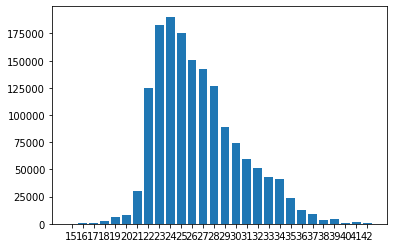

In [60]:
# All teams, all years
plot_subset(df)

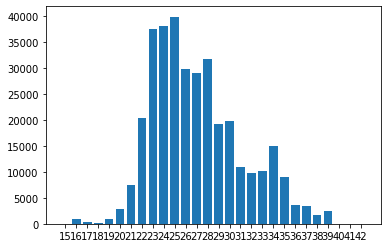

In [61]:
# All teams, 2022
plot_subset(df.loc[(slice(None), '2022'), :])

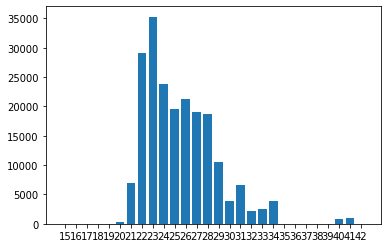

In [62]:
# All teams, 2016
plot_subset(df.loc[(slice(None), '2016'), :])

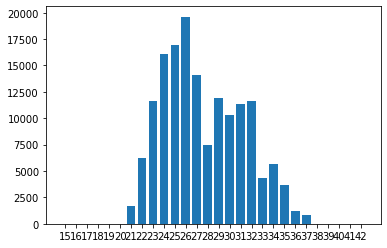

In [63]:
# Reign, all years
plot_subset(df.loc["RGN"])

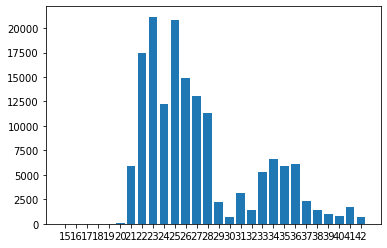

In [64]:
# Gotham, all years
plot_subset(df.loc["NJY"])

## Figure out how to bucket ages to get 3 equal sized groups

In [65]:
total_mins = df.sum().sum()
total_mins / 3

518103.3333333333

In [66]:
age_agg = df.sum()
age_agg

15       208.0
16       883.0
17       437.0
18      2120.0
19      6153.0
20      7663.0
21     29824.0
22    124688.0
23    182992.0
24    190422.0
25    175284.0
26    150664.0
27    142474.0
28    126366.0
29     88777.0
30     74051.0
31     59701.0
32     51304.0
33     42616.0
34     41180.0
35     24099.0
36     12445.0
37      8658.0
38      3917.0
39      4144.0
40       810.0
41      1710.0
42       720.0
dtype: float64

In [67]:
print(age_agg[0:10].sum())
print(age_agg.index[0], "-", age_agg.index[9])

545390.0
15 - 24


In [68]:
print(age_agg[10:13].sum())
print(age_agg.index[10], "-", age_agg.index[12])

468422.0
25 - 27


In [69]:
print(age_agg[13:].sum())
print(age_agg.index[13], "-", age_agg.index[-1])

540498.0
28 - 42


## Plot age proportion in bucket over time

In [70]:
df.sum(axis=1)

BOS  2016    19798.0
     2017    23759.0
CHI  2016    21120.0
     2017    23759.0
     2018    24750.0
              ...   
WAS  2019    23694.0
     2020     8910.0
     2021    25326.0
     2022    29034.0
WNY  2016    22439.0
Length: 69, dtype: float64

In [71]:
def plot_age_subset(sub, ages):
    (low, high) = ages
    rates = sub.div(sub.sum(axis=1), axis=0)
    proportion = rates[list(map(str, range(low, high + 1)))].sum(axis=1)
    plt.plot(proportion.index, proportion.values)
    plt.xticks(rotation=90)
    plt.ylim([0, 1])

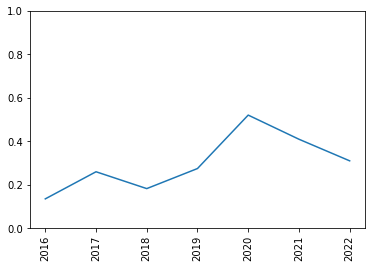

In [72]:
plot_age_subset(df.loc["POR"], (25, 27))

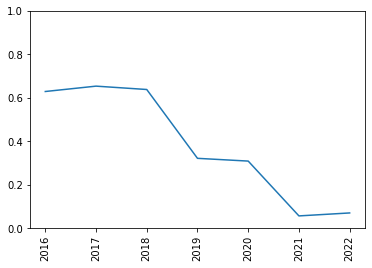

In [73]:
plot_age_subset(df.loc["NJY"], (16, 24))

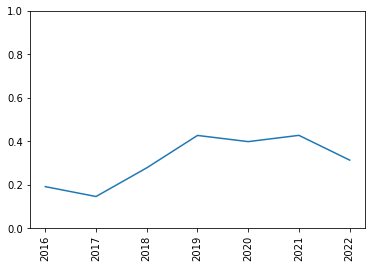

In [74]:
plot_age_subset(df.loc["NJY"], (25, 27))

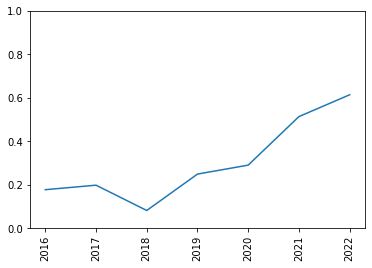

In [75]:
plot_age_subset(df.loc["NJY"], (28, 42))

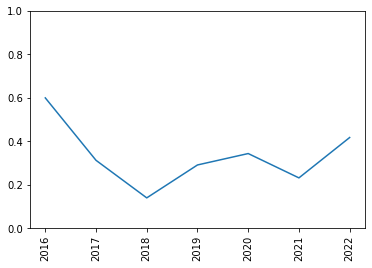

In [76]:
plot_age_subset(df.loc["RGN"], (25, 27))

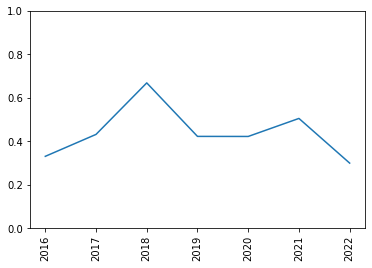

In [77]:
plot_age_subset(df.loc["RGN"], (28, 42))

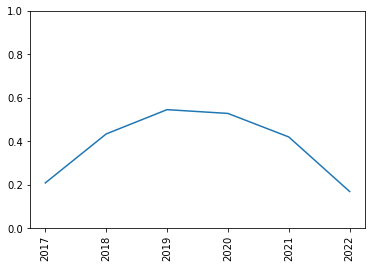

In [78]:
plot_age_subset(df.loc["NC"], (25, 27))

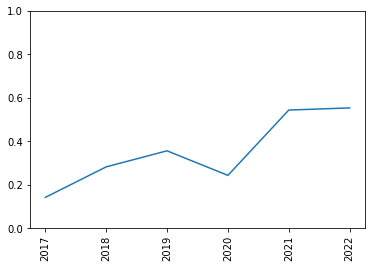

In [79]:
plot_age_subset(df.loc["NC"], (28, 42))

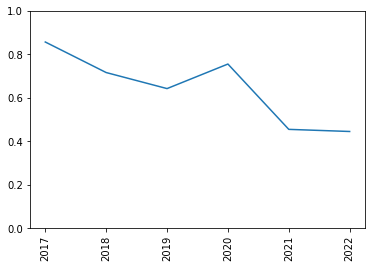

In [80]:
plot_age_subset(df.loc["NC"], (15, 27))